In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
for i in df.columns:
    print("Column Name :",i)
    print(df[i].unique())

Column Name : Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Column Name : Sex
['M' 'F']
Column Name : ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
Column Name : RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Column Name : Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 19

In [ ]:
a = []
for i in df.columns:
    if df[i].dtypes == "object":
        a.append(i)

In [ ]:
print(a)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
a.append("FastingBS")
print(a)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']


In [ ]:
b = []
for i in df.columns:
    if i not in a:
        b.append(i)
b.pop(-1)

'HeartDisease'

In [ ]:
b

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in a: 
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


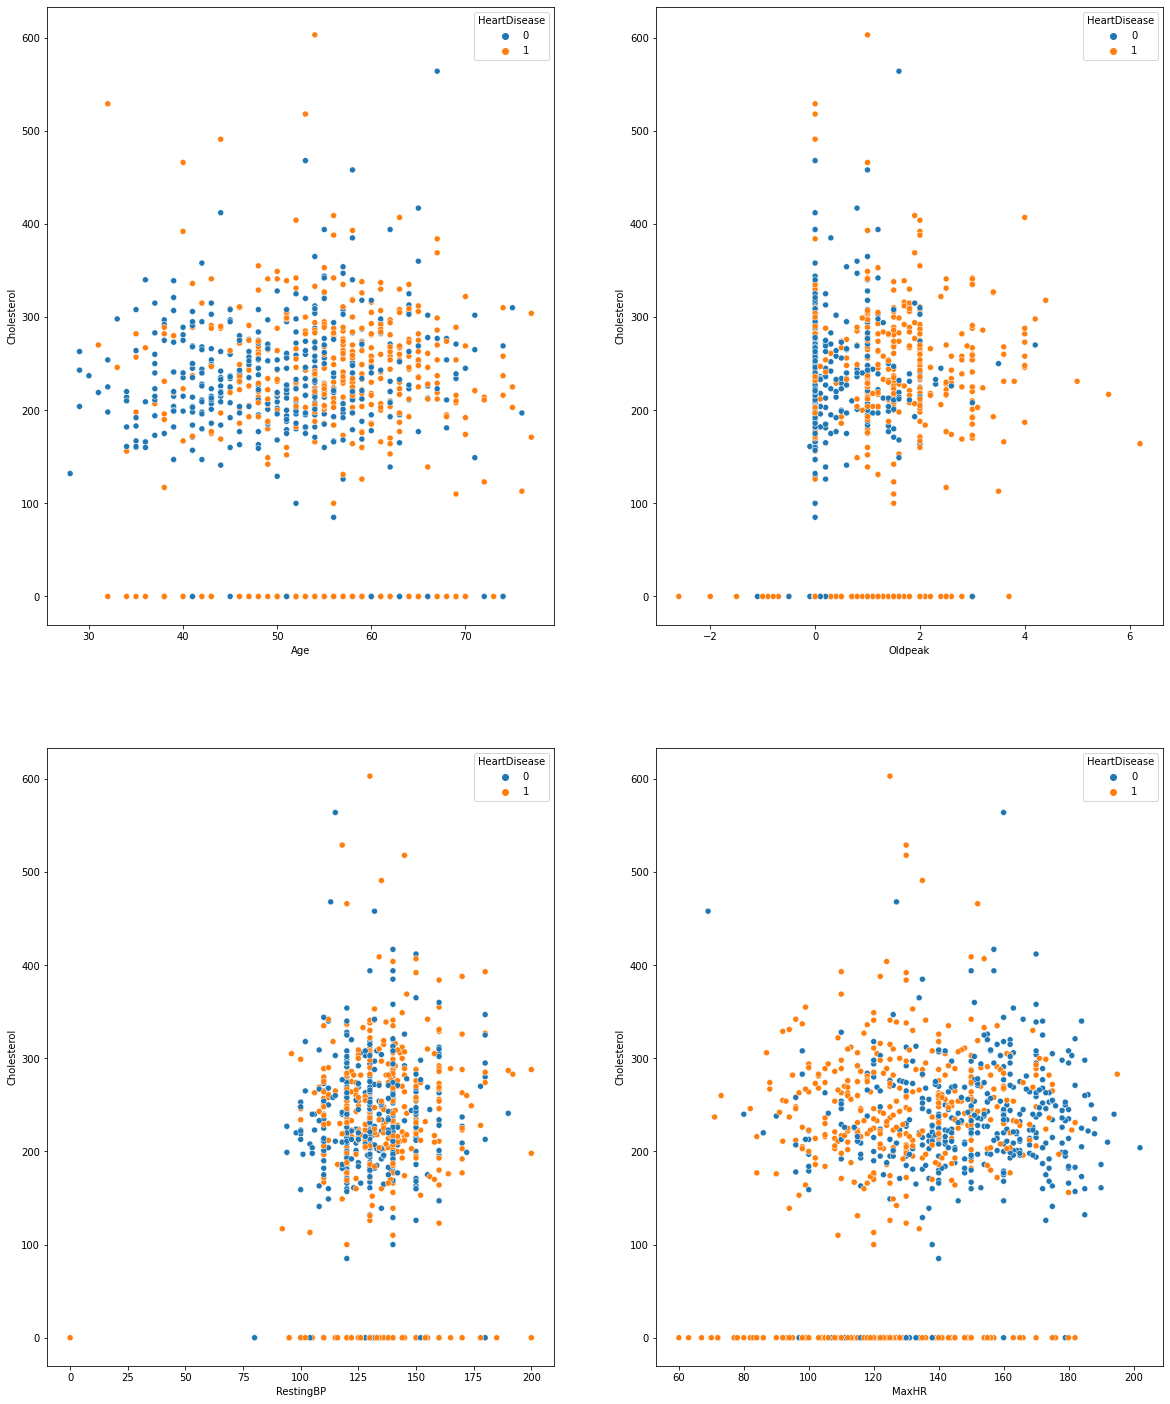

In [ ]:
#postive correlation
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='Age',y='Cholesterol',data=df,hue='HeartDisease',ax=ax[0][0])
sns.scatterplot(x='RestingBP',y='Cholesterol',data=df,hue='HeartDisease',ax=ax[1][0])
sns.scatterplot(x='Oldpeak',y='Cholesterol',data=df,hue='HeartDisease',ax=ax[0][1])
sns.scatterplot(x='MaxHR',y='Cholesterol',data=df,hue='HeartDisease',ax=ax[1][1])
plt.show()

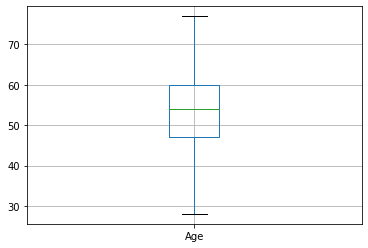

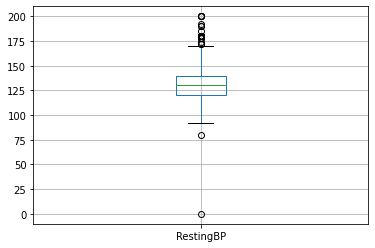

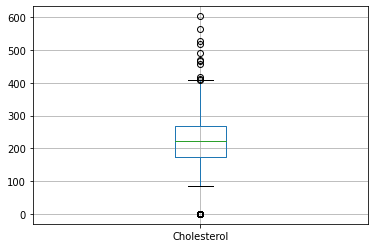

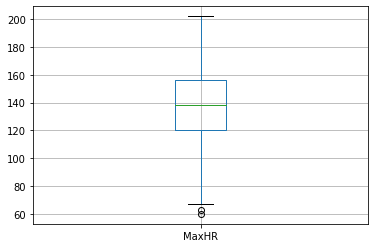

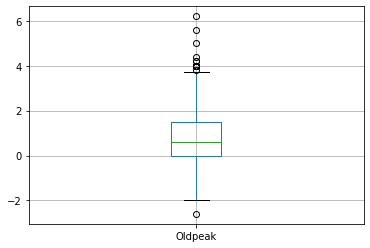

In [ ]:
for i in b:
    df.boxplot(i)
    plt.show()

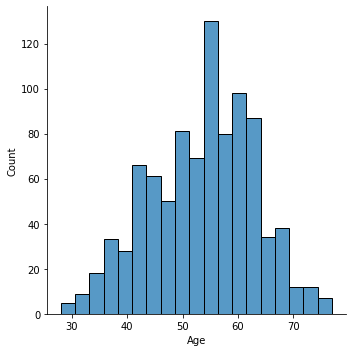

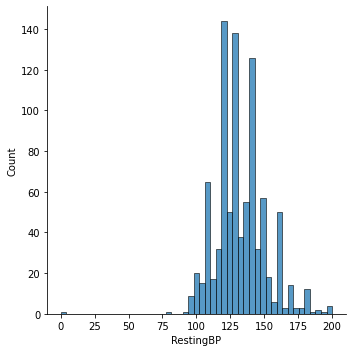

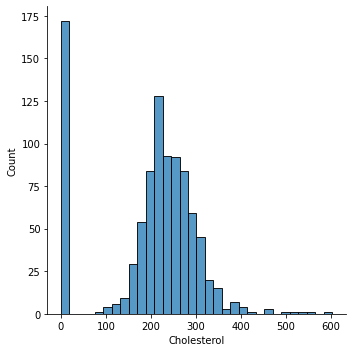

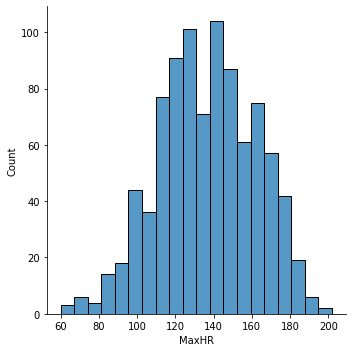

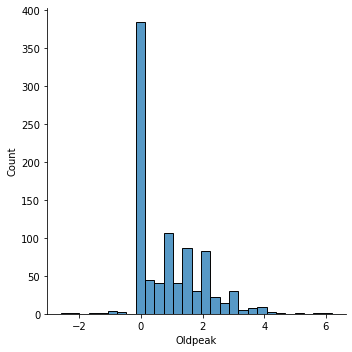

In [ ]:
#fig,ax=plt.subplots(2,2,figsize=(20,25))
for i in b:
    sns.displot(df[i])
    plt.show()

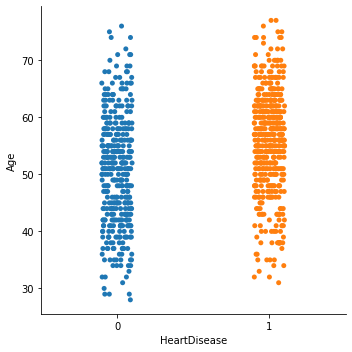

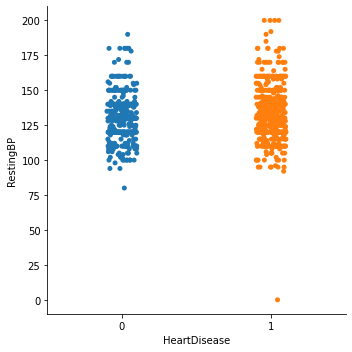

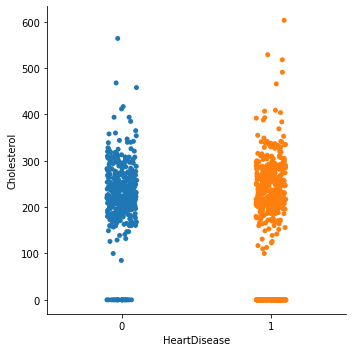

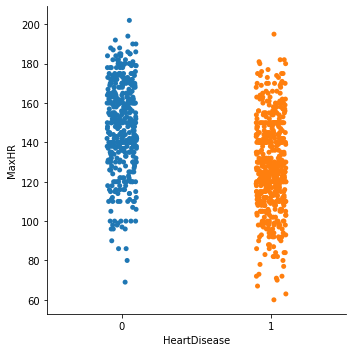

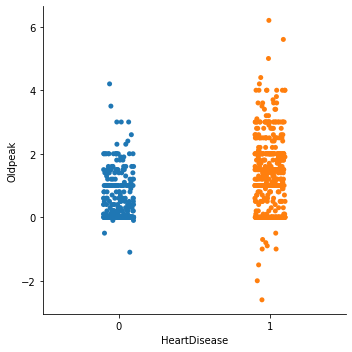

In [ ]:
for i in b:
    sns.catplot(x="HeartDisease", y=i, data=df)
    plt.show()

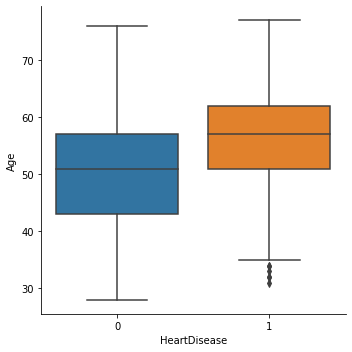

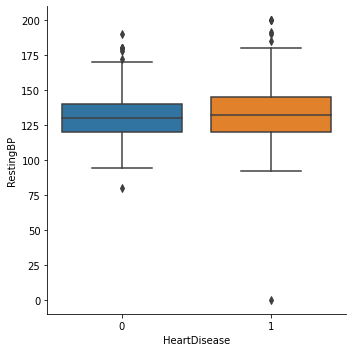

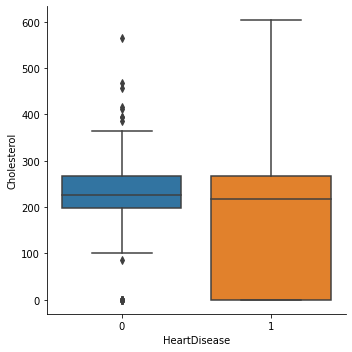

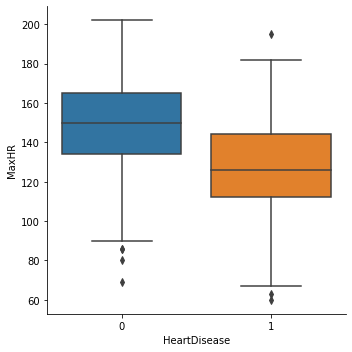

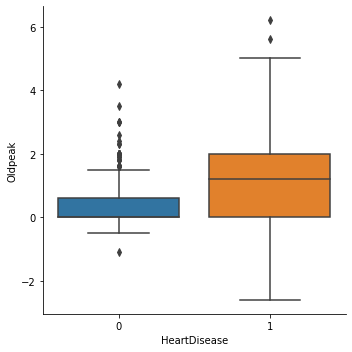

In [ ]:
for i in b:
    sns.catplot(x="HeartDisease",kind = "box", y=i, data=df)
    plt.show()

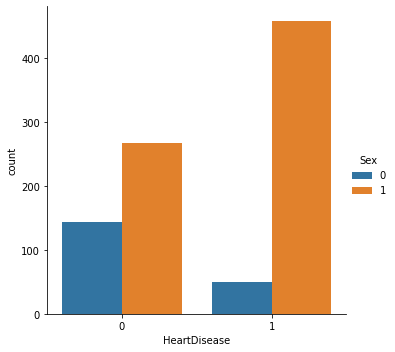

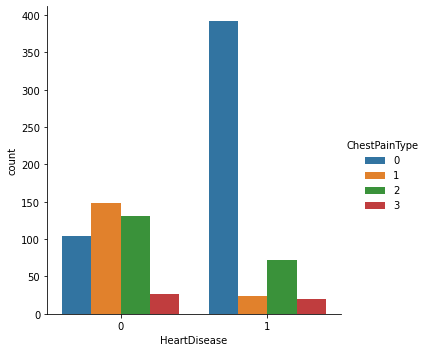

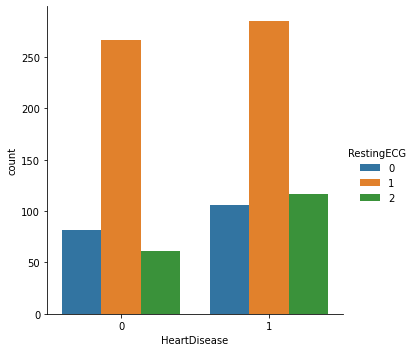

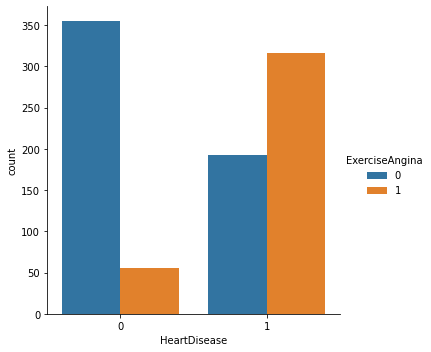

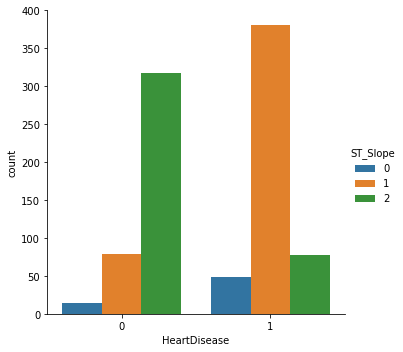

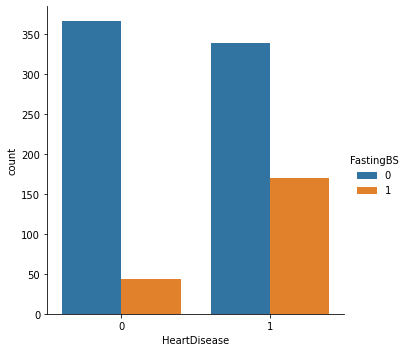

In [ ]:
for i in a:
    sns.catplot(x="HeartDisease",kind = "count", hue=i, data=df)
    plt.show()

In [ ]:
X = df.values[:,0:-1]  #-->0 to -2
Y = df.values[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [ ]:
print(X)

[[-1.4331398   0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 [-0.47848359 -1.93816322  1.27505906 ... -0.8235563   0.10566353
  -0.59607813]
 [-1.75135854  0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 ...
 [ 0.37009972  0.51595242 -0.81699495 ...  1.21424608  0.29328271
  -0.59607813]
 [ 0.37009972 -1.93816322  0.22903206 ... -0.8235563  -0.83243239
  -0.59607813]
 [-1.64528563  0.51595242  1.27505906 ... -0.8235563  -0.83243239
   1.05211381]]


In [ ]:
Y=Y.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  


In [ ]:
X_train.shape

(642, 11)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None) #to view the entire eigen vector,no subsetting
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.25582444 0.1346311  0.10447074 0.09071922 0.07974776 0.07512345
 0.07201001 0.05808721 0.04958885 0.04458034 0.03521687]


# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100, random_state=10)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_cv = KFold(n_splits=10,random_state=10,shuffle=True)
kfold_cv_result = cross_val_score(estimator = classifier, X=X_train, y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
print(kfold_cv_result.mean())

[0.84615385 0.86153846 0.828125   0.875      0.890625   0.875
 0.8125     0.859375   0.859375   0.921875  ]
0.8629567307692309


In [ ]:
for train_value, test_value in kfold_cv.split(X_train,Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1),

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[101  26]
 [ 21 128]]

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       127
           1       0.83      0.86      0.84       149

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

Accuracy of the model:  0.8297101449275363


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
kfold_cv1 = KFold(n_splits = 10,random_state = 10, shuffle = True)
kfold_cv1_result = cross_val_score(estimator = DTClassifier, X= X_train, y=Y_train,cv = kfold_cv1)
print(kfold_cv1_result)
#finding the mean
print(kfold_cv1_result.mean())

[0.76923077 0.81538462 0.75       0.859375   0.84375    0.765625
 0.828125   0.703125   0.734375   0.796875  ]
0.7865865384615385


In [ ]:
for train_value, test_value in kfold_cv.split(X_train,Y_train):
    DTClassifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=DTClassifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (0, 1), (0, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (1, 0), (1, 0), (0, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (1, 0), (1, 0), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (1, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1),

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 97  30]
 [ 29 120]]

Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       127
           1       0.80      0.81      0.80       149

    accuracy                           0.79       276
   macro avg       0.78      0.78      0.78       276
weighted avg       0.79      0.79      0.79       276

Accuracy of the model:  0.7862318840579711


# SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
SClassifier = SGDClassifier(loss = "log", random_state = 10, learning_rate="optimal",max_iter=1000, shuffle=True,
                        early_stopping=True,n_iter_no_change=5 )
kfold_cv2_result=cross_val_score(estimator=SClassifier,X=X_train,y=Y_train, cv=kfold_cv)
print(kfold_cv2_result)
print(kfold_cv_result.mean())

[0.69230769 0.72307692 0.78125    0.859375   0.890625   0.765625
 0.578125   0.828125   0.71875    0.921875  ]
0.8629567307692309


In [ ]:
for train_value, test_value in kfold_cv.split(X_train,Y_train):
    SClassifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=SClassifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (1, 1), (1, 1),

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[105  22]
 [ 32 117]]

Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       127
           1       0.84      0.79      0.81       149

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.80       276

Accuracy of the model:  0.8043478260869565


# SVC

In [ ]:
from sklearn.svm import SVC
SVCclassifier=SVC(kernel='rbf',C=0.5,gamma=0.01)
kfold_cv3_result=cross_val_score(estimator=SClassifier,X=X_train,y=Y_train, cv=kfold_cv)
print(kfold_cv3_result)
print(kfold_cv3_result.mean())

[0.69230769 0.72307692 0.78125    0.859375   0.890625   0.765625
 0.578125   0.828125   0.71875    0.921875  ]
0.7759134615384615


In [ ]:
for train_value, test_value in kfold_cv.split(X_train,Y_train):
    SVCclassifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=SVCclassifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1),

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[105  22]
 [ 25 124]]

Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       127
           1       0.85      0.83      0.84       149

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

Accuracy of the model:  0.8297101449275363
